* Bar charts for qualitative variables (string)
    - sorted nominal data 
    - ordinal data - generally osrting not required
* Histograms for quantitative variables 
### Data Symentaics
- A dataset is a collection of values, usually either numbers (if quantitative) or strings (if qualitative). Values are organised in two ways. Every value belongs to a variable and an observation. 
- A variable contains all values that measure the same underlying attribute (like height, temperature, duration) across units. 
- An observation contains all values measured on the same unit (like a person, or a day, or a race) across attributes

#### In tidy data:
1 - Each variable forms a column.

2 - Each observation forms a row.

3 - Each type of observational unit forms a table.

### Helpful link - https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html

## Bar Chart

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline


In [2]:
pokemon = pd.read_csv('pokemon.csv')
print (pokemon.shape)
pokemon.head(10)

(807, 14)


,id,species,generation_id,height,weight,base_experience,type_1,type_2,hp,attack,defense,speed,special-attack,special-defense
0,1,bulbasaur,1,0.7,6.9,64,grass,poison,45,49,49,45,65,65
1,2,ivysaur,1,1.0,13.0,142,grass,poison,60,62,63,60,80,80
2,3,venusaur,1,2.0,100.0,236,grass,poison,80,82,83,80,100,100
3,4,charmander,1,0.6,8.5,62,fire,NaN,39,52,43,65,60,50
4,5,charmeleon,1,1.1,19.0,142,fire,NaN,58,64,58,80,80,65
5,6,charizard,1,1.7,90.5,240,fire,flying,78,84,78,100,109,85
6,7,squirtle,1,0.5,9.0,63,water,NaN,44,48,65,43,50,64
7,8,wartortle,1,1.0,22.5,142,water,NaN,59,63,80,58,65,80
8,9,blastoise,1,1.6,85.5,239,water,NaN,79,83,100,78,85,105
9,10,caterpie,1,0.3,2.9,39,bug,NaN,45,30,35,45,20,20


<AxesSubplot:xlabel='generation_id', ylabel='count'>

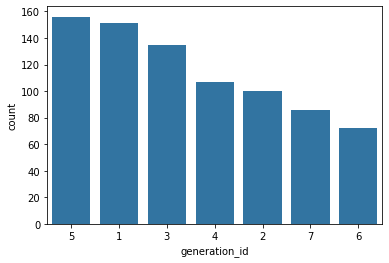

In [3]:
base_color = sb.color_palette()[0]
cat_order = pokemon['generation_id'].value_counts().index
sb.countplot(data = pokemon, x = 'generation_id', color = base_color, order= cat_order)

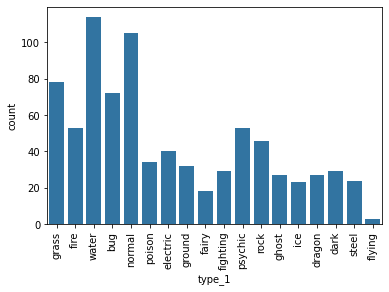

In [4]:
sb.countplot(data = pokemon, x = 'type_1', color = base_color);
plt.xticks(rotation = 90);

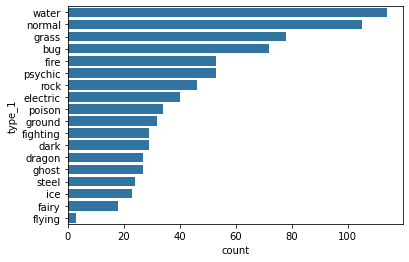

In [5]:
cat_order = pokemon['type_1'].value_counts().index;
sb.countplot(data = pokemon, y = 'type_1', color = base_color, order= cat_order);

In [6]:
pk = pokemon.melt (id_vars = ['id', 'species'],
                   value_vars = ['type_1', 'type_2'],
                   var_name = 'type_level', value_name = 'type').dropna()
pk[802:812]

,id,species,type_level,type
802,803,poipole,type_1,poison
803,804,naganadel,type_1,poison
804,805,stakataka,type_1,rock
805,806,blacephalon,type_1,fire
806,807,zeraora,type_1,electric
807,1,bulbasaur,type_2,poison
808,2,ivysaur,type_2,poison
809,3,venusaur,type_2,poison
812,6,charizard,type_2,flying
818,12,butterfree,type_2,flying


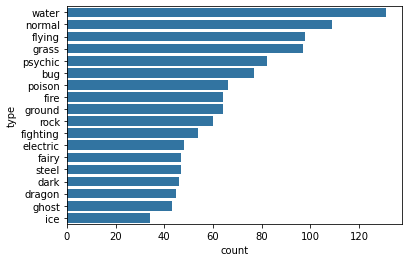

In [7]:
type_order = pk['type'].value_counts().index;
sb.countplot(data = pk, y = 'type', color = base_color, order= type_order);

In [8]:
# get proportion taken by most common group for derivation
# of tick marks
n_points = pokemon.shape[0]
max_count = pk['type'].value_counts().max()
max_prop = max_count / n_points
print (max_prop)
# generate tick mark locations and names
tick_props = np.arange(0, max_prop, 0.02)
tick_names = ['{:0.2f}'.format(v) for v in tick_props];
print (tick_names)

0.1623296158612144
['0.00', '0.02', '0.04', '0.06', '0.08', '0.10', '0.12', '0.14', '0.16']


Text(0.5, 0, 'proportion')

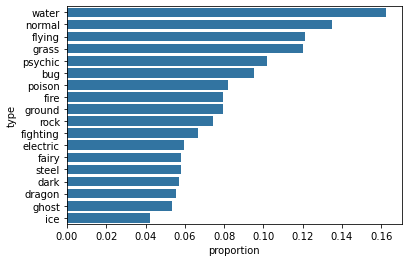

In [9]:
# create the plot
sb.countplot(data = pk, y = 'type', color = base_color, order = type_order)
plt.xticks(tick_props * n_points, tick_names)
plt.xlabel('proportion')

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17]


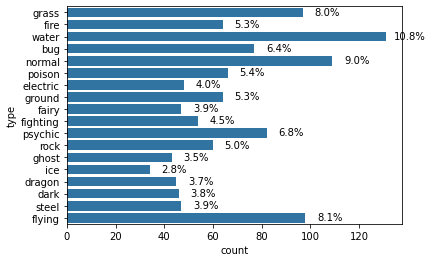

In [10]:
sb.countplot(data = pk, y = 'type', color = base_color)

# add annotations
n_points = pk.shape[0]
type_counts = pk['type'].value_counts()
locs, labels = plt.yticks() # get the current tick locations and labels
print (locs)
# loop through each pair of locations and labels
for loc, label in zip(locs, labels):

    # get the text property for the label to get the correct count
    count = type_counts[label.get_text()]
    pct_string = '{:0.1f}%'.format(100*count/n_points)

    # print the annotation just below the top of the bar
    plt.text(count+10, loc+0.2, pct_string, ha = 'center')

<AxesSubplot:>

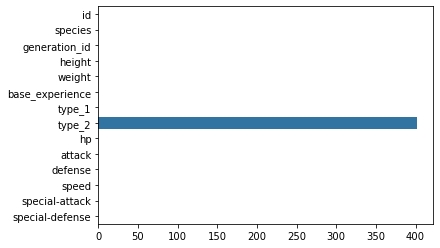

In [11]:
# missing data
na_counts = pokemon.isna().sum()
sb.barplot(x = na_counts, y = na_counts.index.values, color = base_color)

## Histogram and Pie chart